In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

get_ipython().run_line_magic('matplotlib', 'inline')
# %matplotlib inline

path = 'C://Windows/Fonts/malgun.ttf'

if platform.system() == 'Darwin':
    rc('font', family = 'Arial Unicode MS')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown System.. Sry')

import time

nowtime = time.localtime()
nowtime_mm = time.strftime('%m', nowtime) # Month
nowtime_dd = time.strftime('%d', nowtime) # Day

In [3]:
f_path = os.getcwd() # 현재 작업 경로 기준
directory_name = f'FigureOut_{nowtime_mm}{nowtime_dd}'
save_f_path = f_path + '/' + directory_name + '/'

try:    
    os.mkdir(directory_name)
except:
    pass

In [4]:
df = pd.read_csv(f_path + '/data/result.csv', encoding = 'utf-8')
del df['Unnamed: 0']
df

,talk_date,day_name,writer,wrote_at,msg,action_msg,is_talking_activity,is_notice_action,is_deleted_msg,is_emoji,is_picture,is_search
0,2023-08-13,일요일,ㅎ히,NaN,ㅎ히님이 들어왔습니다.,들어오기,False,False,False,False,False,False
1,2023-08-13,일요일,빅지기/DA/2,NaN,빅지기/DA/2님이 나갔습니다.,나가기,False,False,False,False,False,False
2,2023-08-14,월요일,PA(어린이팬)/데이터분석/2년차,10:56,"군집별 CTR 데이터를 보고 있습니다. 특정 군집이 CTR이 가장 높은데, 해당 군...",NaN,True,False,False,False,False,False
3,2023-08-14,월요일,귬/데이터분석,NaN,귬/데이터분석님이 나갔습니다.,나가기,False,False,False,False,False,False
4,2023-08-14,월요일,어린이/데이터분석/10년차,16:01,저라면 이벤트 수는 적지만 다른 군집보다 CTR이 유의미하게 차이가 있는지 먼저 검...,NaN,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3741,2023-12-02,토요일,지지플랏/데분/4년,17:05,다단계인가?!,NaN,True,False,False,False,False,False
3742,2023-12-02,토요일,Tube/그로스/4,17:06,dogfooding 을 하길 원하나보네요,NaN,True,False,False,False,False,False
3743,2023-12-02,토요일,인생이우당탕/데이터분석/2년차,17:44,"가지마세요 ,,",NaN,True,False,False,False,False,False
3744,2023-12-02,토요일,데아/통계학과,19:07,혹시 기술 블로그로 velog 쓰시는분 계시나요 !? ㅠㅠ 몇일전부터 사진 업로드가...,NaN,True,False,False,False,False,False


In [5]:
df_io_Cnt = df[['talk_date', 'day_name', 'action_msg']].dropna()
df_io_Cnt['io_classified'] = np.nan

df_io_Cnt['io_classified'] = df_io_Cnt['action_msg'].apply(lambda x: 0 if '들어오기' in x else (1 if '나가기' in x else (2 if '메시지 가리기' in x else np.nan)))

df_io_Cnt

,talk_date,day_name,action_msg,io_classified
0,2023-08-13,일요일,들어오기,0
1,2023-08-13,일요일,나가기,1
3,2023-08-14,월요일,나가기,1
45,2023-08-14,월요일,들어오기,0
46,2023-08-14,월요일,들어오기,0
...,...,...,...,...
3663,2023-11-29,수요일,들어오기,0
3702,2023-11-30,목요일,나가기,1
3714,2023-11-30,목요일,나가기,1
3717,2023-12-01,금요일,나가기,1


In [6]:
# 얘는 왜 안되지??
#for idx in range(len(df_io_Cnt['action_msg'])):
#    if '들어오기' in df_io_Cnt['action_msg'][idx]:
#        df_io_Cnt.at[idx, 'io_classified'] = 0
#    elif '나가기' in df_io_Cnt['action_msg'][idx]:
#        df_io_Cnt.at[idx, 'io_classified'] = 1
#    elif '메시지 가리기' in df_io_Cnt['action_msg'][idx]:
#        df_io_Cnt.at[idx, 'io_classified'] = 2

io_classify = df_io_Cnt.groupby(['talk_date','day_name','action_msg'])[['io_classified']].count()
io_classify.reset_index(inplace = True)
io_classify = io_classify[io_classify['action_msg'].isin(['나가기','들어오기'])]
io_classify.head()

,talk_date,day_name,action_msg,io_classified
0,2023-08-13,일요일,나가기,1
1,2023-08-13,일요일,들어오기,1
2,2023-08-14,월요일,나가기,3
3,2023-08-14,월요일,들어오기,22
4,2023-08-16,수요일,나가기,2


In [7]:
tmp = io_classify.copy()
tmp['talk_date'] = pd.to_datetime(tmp['talk_date'])

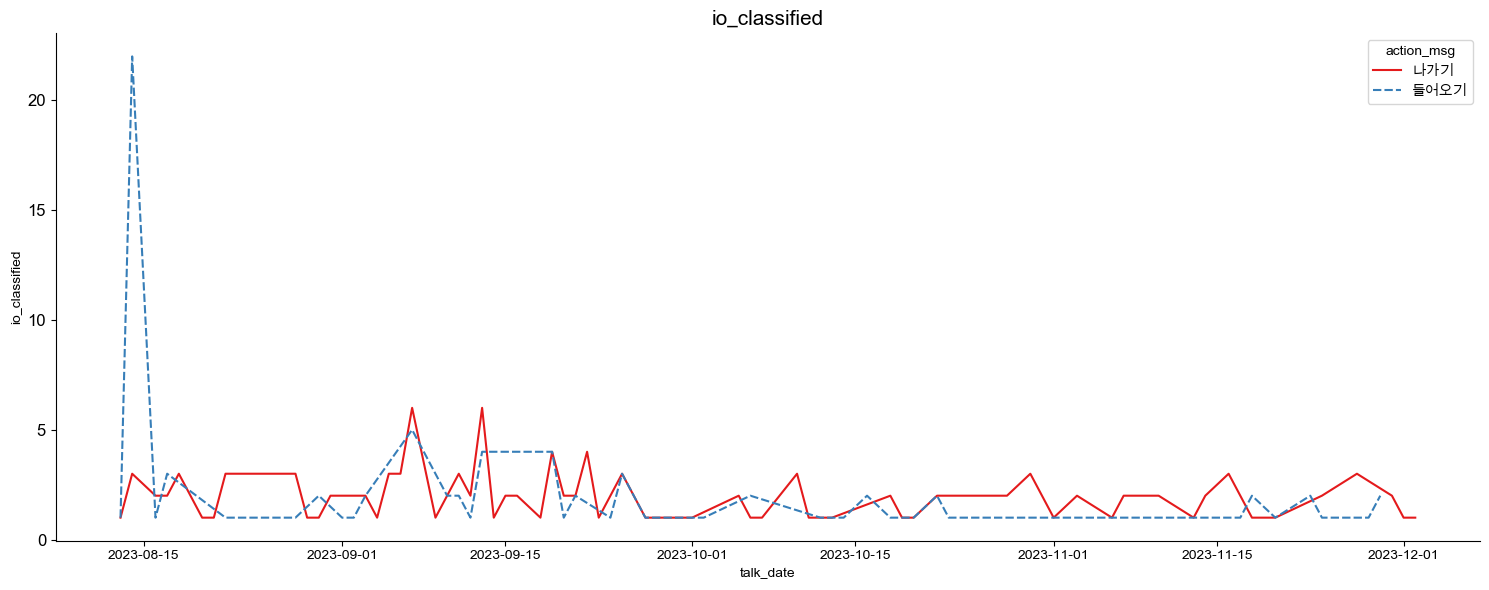

In [8]:
from matplotlib import dates

plt.figure(figsize = (15, 6))
sns.lineplot(data = tmp, x = 'talk_date', y = 'io_classified', hue = 'action_msg', style = 'action_msg',palette = 'Set1')

plt.title('io_classified', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
sns.despine()

plt.tight_layout()
plt.savefig(save_f_path + 'io_classified.png')


## COUNT : 월 단위 in and out
### 전체

In [9]:
io_classify[['year', 'month', 'day']] = io_classify['talk_date'].str.split('-', expand=True)
io_month = io_classify.groupby(['month','action_msg'])[['io_classified']].sum()
io_month.reset_index(inplace = True)
io_month.head()

,month,action_msg,io_classified
0,08,나가기,23
1,08,들어오기,33
2,09,나가기,53
3,09,들어오기,30
4,10,나가기,26


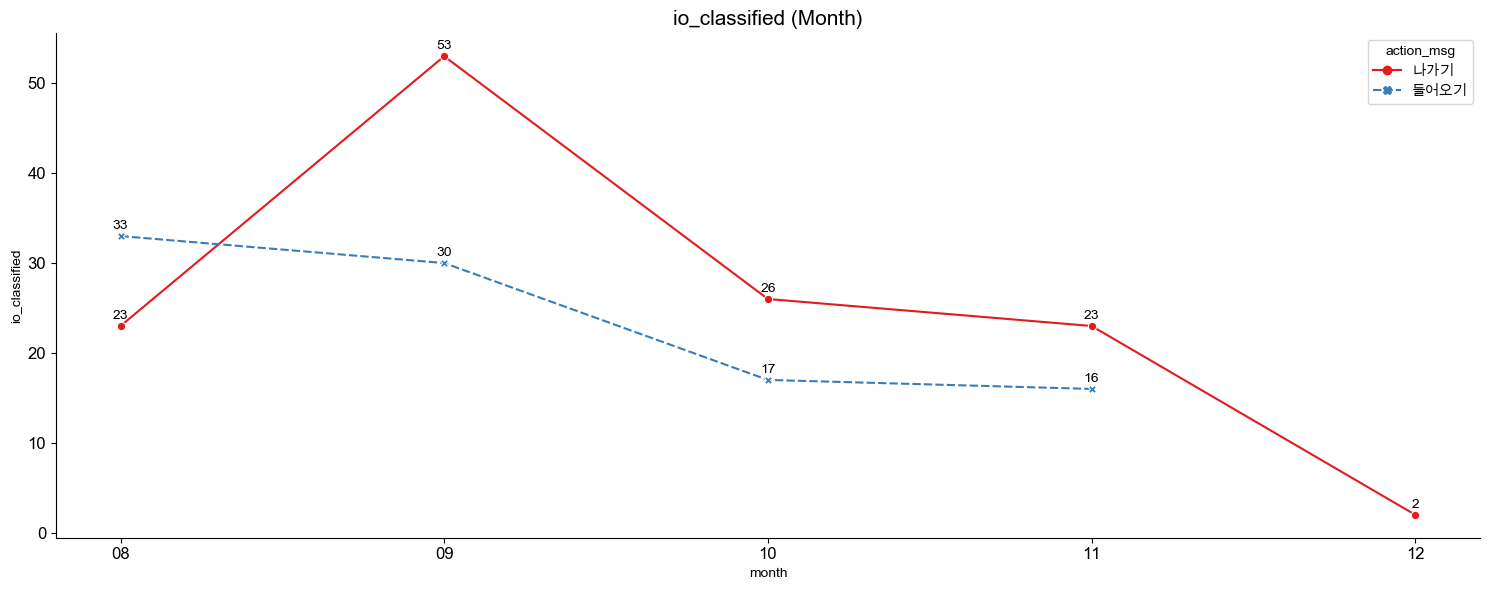

In [10]:
# 월별 시계열 데이터
plt.figure(figsize = (15, 6))
gg = sns.lineplot(data = io_month, x = 'month', y = 'io_classified', hue = 'action_msg', style='action_msg', markers = True, palette = 'Set1')

for line in gg.lines:
    x, y = line.get_data()
    for i, txt in enumerate(y):
        plt.annotate(txt, (x[i], y[i]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('io_classified (Month)', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
sns.despine()

plt.tight_layout()
plt.savefig(save_f_path + 'io_classified(Month).png')


### 일별 in and out Count

In [11]:
month_number_to_english = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

io_classify['month'] = io_classify['month'].astype(int)
io_classify['month_name'] = io_classify['month'].map(month_number_to_english)
io_classify.head()

,talk_date,day_name,action_msg,io_classified,year,month,day,month_name
0,2023-08-13,일요일,나가기,1,2023,8,13,August
1,2023-08-13,일요일,들어오기,1,2023,8,13,August
2,2023-08-14,월요일,나가기,3,2023,8,14,August
3,2023-08-14,월요일,들어오기,22,2023,8,14,August
4,2023-08-16,수요일,나가기,2,2023,8,16,August


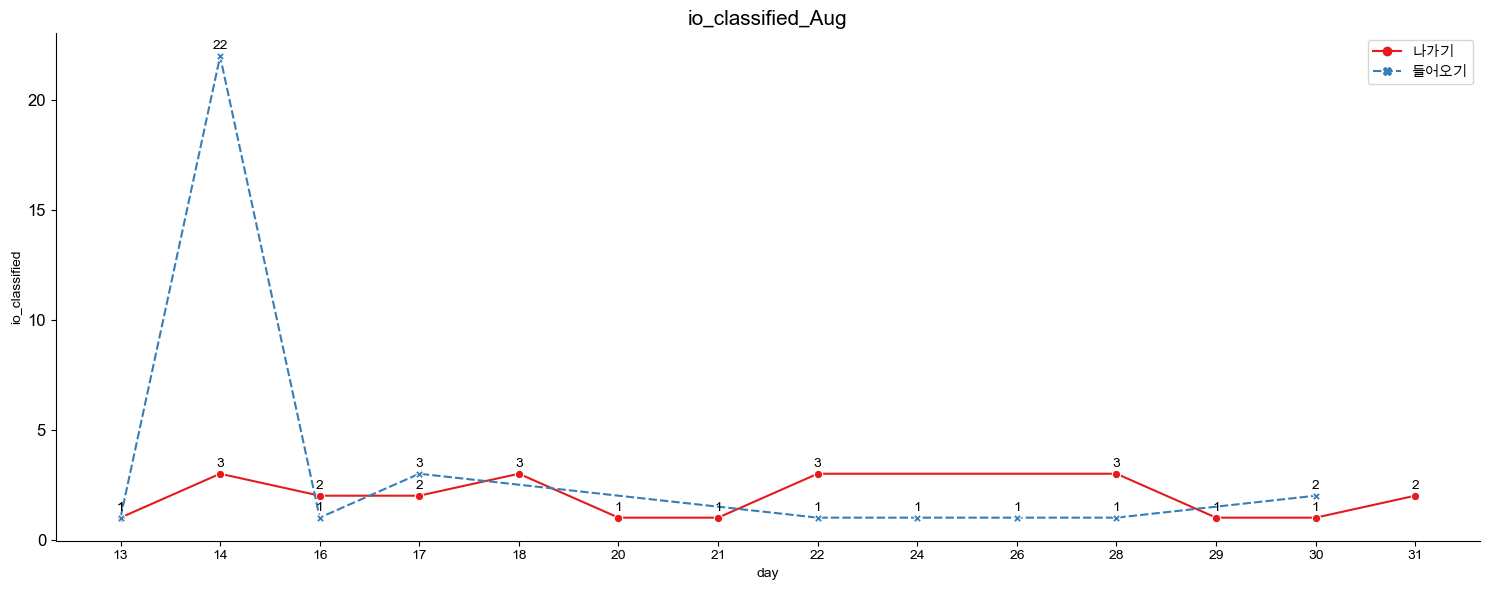

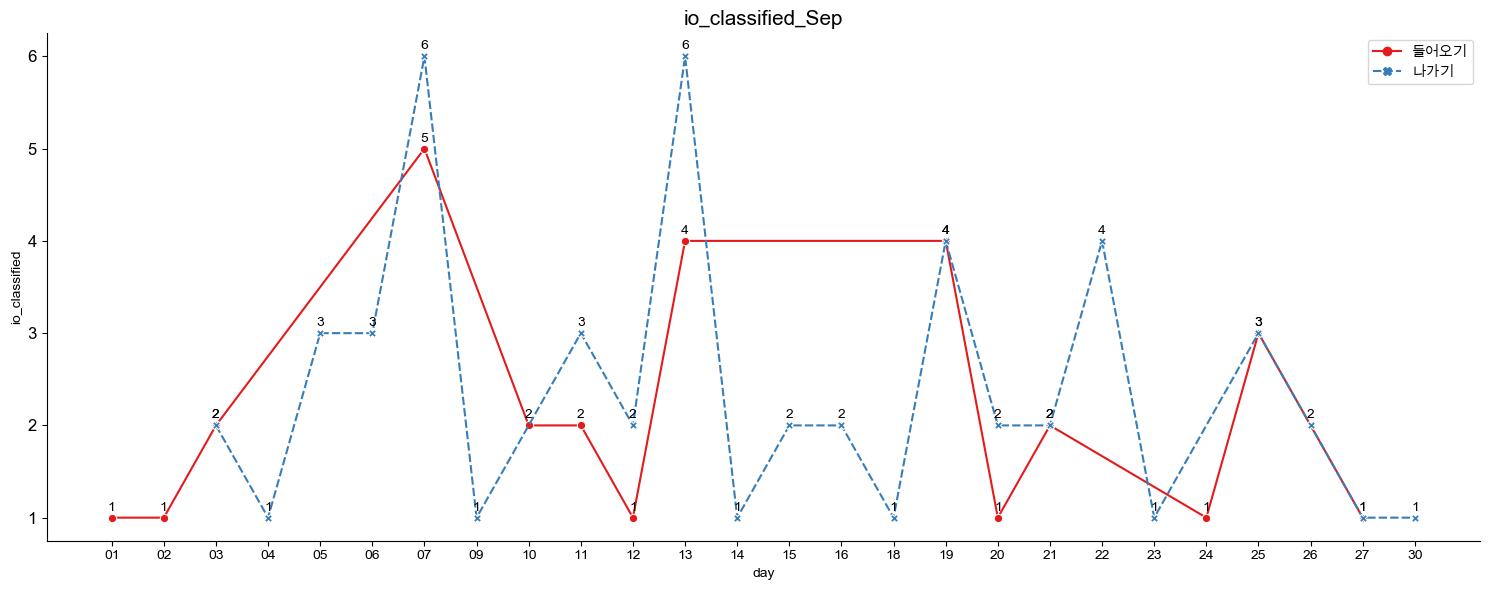

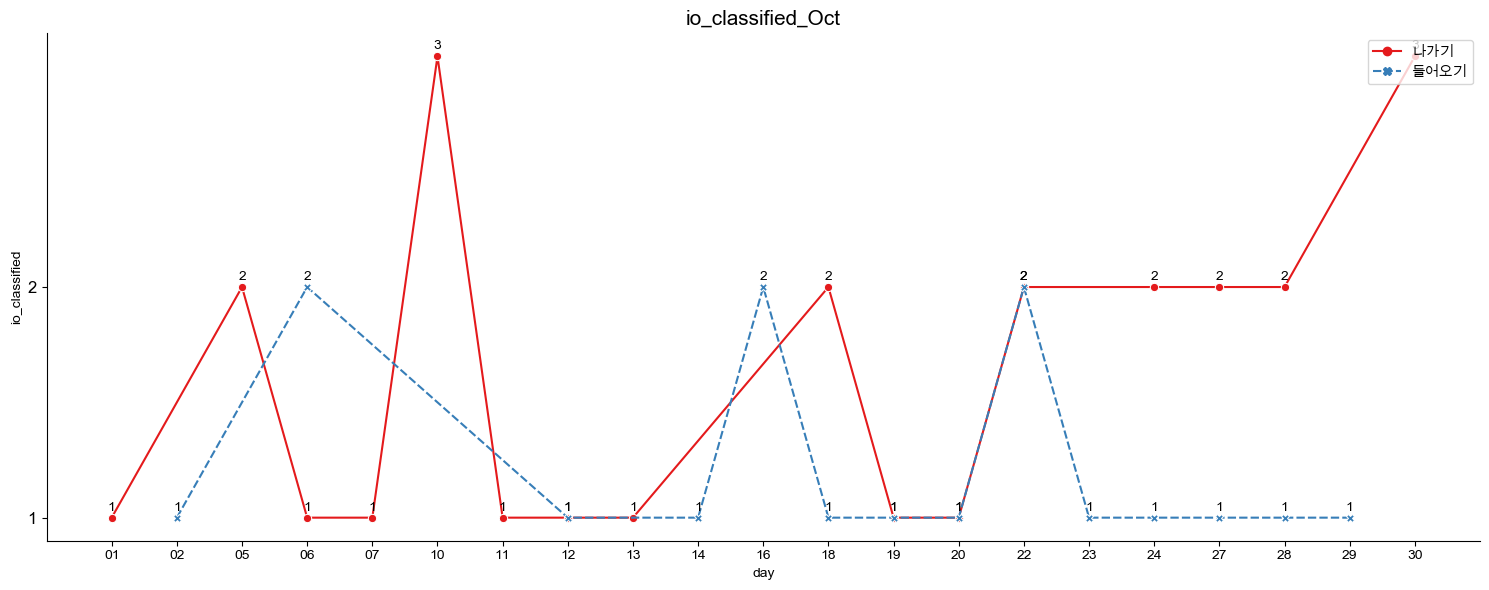

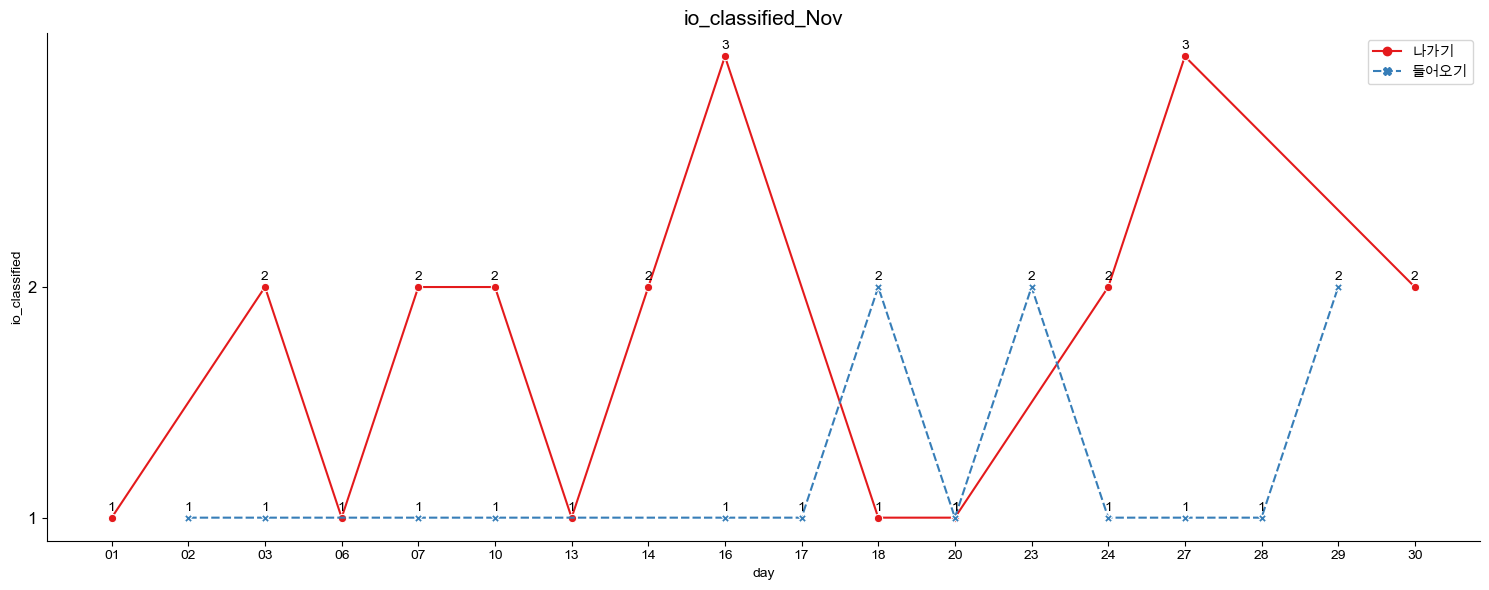

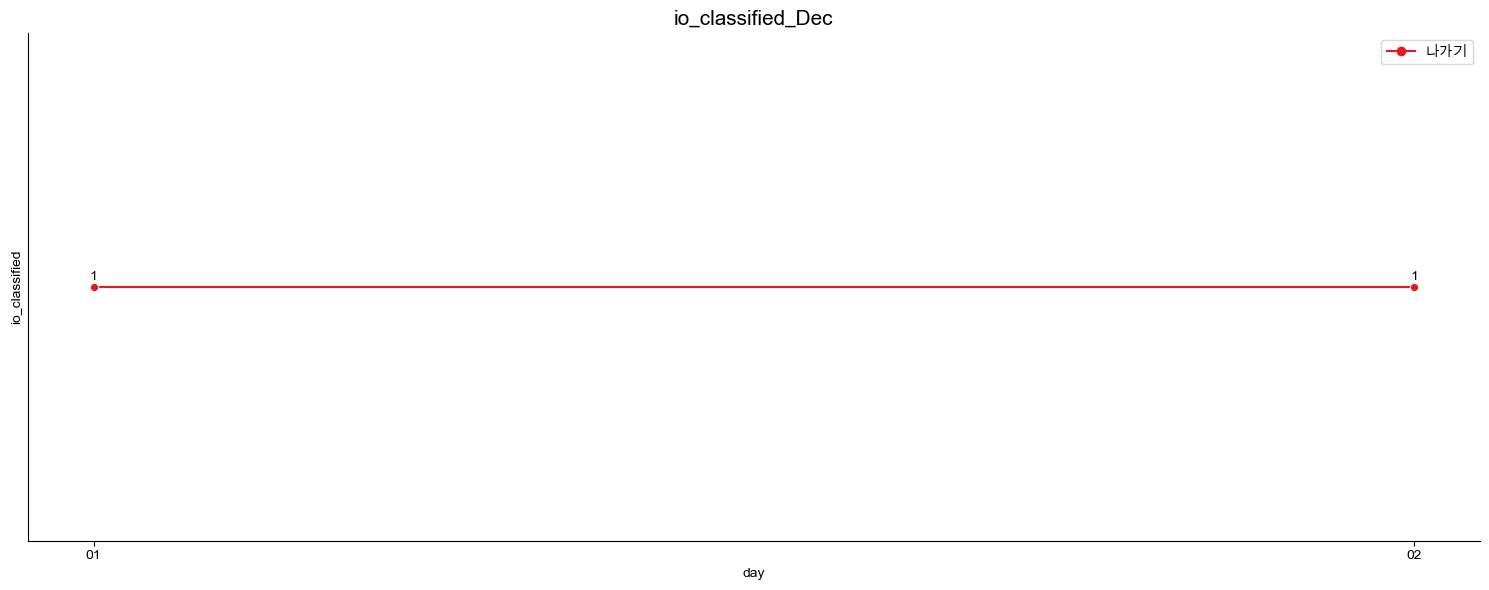

In [12]:
for mon in io_classify['month_name'].unique():
    io_each_month = io_classify[io_classify['month_name'] == mon]

    plt.figure(figsize = (15, 6))
    gg = sns.lineplot(data = io_each_month, x = 'day', y = 'io_classified', hue = 'action_msg', style='action_msg', markers = True, palette = 'Set1')

    for line in gg.lines:
        x, y = line.get_data()
        for i, txt in enumerate(y):
            plt.annotate(txt, (x[i], y[i]), textcoords="offset points", xytext=(0, 5), ha='center')

    plt.title('io_classified_{}' .format(str(mon[:3])), fontsize = 15)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 12)
    plt.legend(loc = 'upper right')
    if max(io_each_month['io_classified']) <= 5:
        plt.yticks(range(min(io_each_month['io_classified']), max(io_each_month['io_classified']), 1))
        
    sns.despine()

    plt.tight_layout()
    plt.savefig(save_f_path + 'io_classified_{}' .format(str(mon[:3])))
    # plt.close()

In [13]:
### 요일별 in and out count
# Grouping data preparation
io_day = io_classify.groupby(['day_name', 'action_msg'])[['io_classified']].sum().reset_index()

# Define the custom order for sorting
custom_order = ['일요일', '월요일', '화요일', '수요일', '목요일', '금요일', '토요일']

# Sort the DataFrame by 'day_name' using the custom order
io_day = io_day.sort_values(by = 'day_name', key = lambda x: x.map({day: i for i, day in enumerate(custom_order)}))

# Print the resulting DataFrame
io_day

,day_name,action_msg,io_classified
8,일요일,나가기,7
9,일요일,들어오기,9
6,월요일,나가기,24
7,월요일,들어오기,34
12,화요일,나가기,24
13,화요일,들어오기,9
4,수요일,나가기,19
5,수요일,들어오기,12
2,목요일,나가기,22
3,목요일,들어오기,17


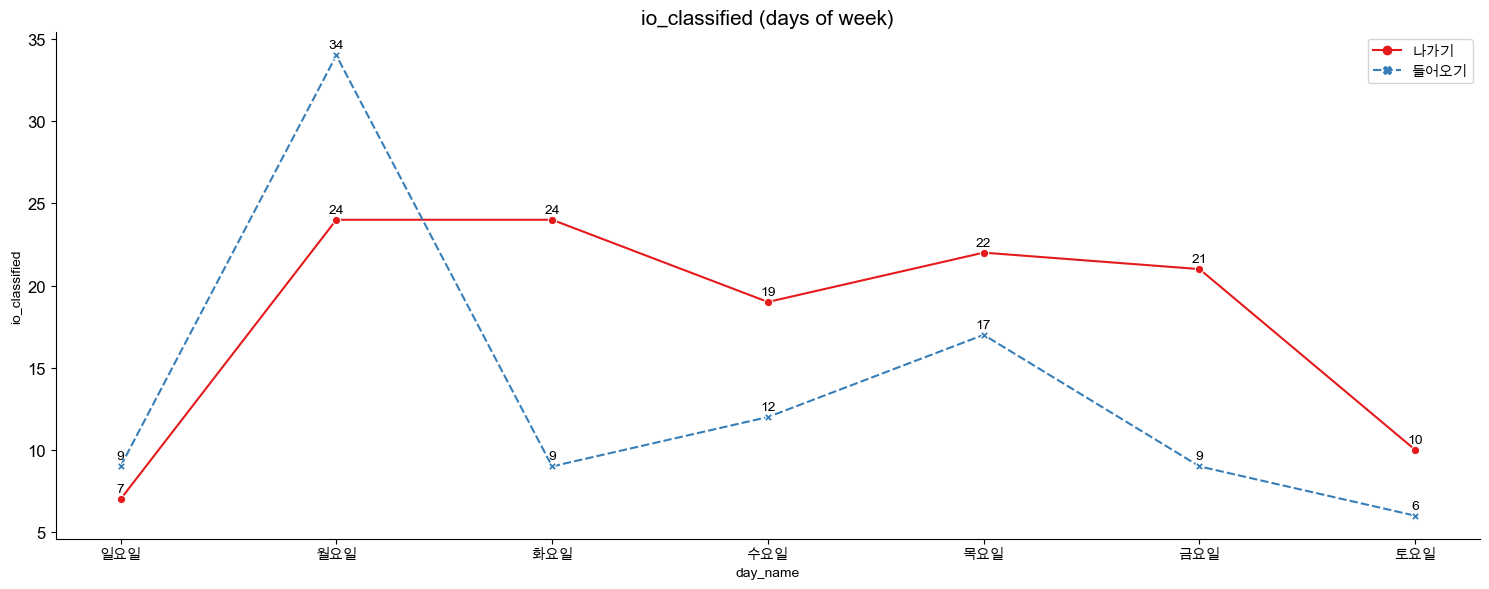

In [14]:
plt.figure(figsize = (15, 6))
gg = sns.lineplot(data = io_day, x = 'day_name', y = 'io_classified', hue = 'action_msg', style = 'action_msg', markers = True, palette = 'Set1')

for line in gg.lines:
    x, y = line.get_data()
    for i, txt in enumerate(y):
        plt.annotate(txt, (x[i], y[i]), textcoords = "offset points", xytext=(0, 5), ha='center')

plt.title('io_classified (days of week)', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.legend(loc = 'upper right')
sns.despine()
plt.tight_layout()
plt.savefig(save_f_path + 'io_classified (days of week)')
# plt.close()

## 2. 활동량

In [15]:
message_df = df[['talk_date', 'day_name', 'wrote_at', 'msg', 'is_talking_activity']]
message_df = message_df[message_df['is_talking_activity'] == True]
message_df[['year', 'month', 'day']] = message_df['talk_date'].str.split('-', expand=True)
message_df['month'] = message_df['month'].astype(int)
message_df['month_name'] = message_df['month'].map(month_number_to_english)
message_df

,talk_date,day_name,wrote_at,msg,is_talking_activity,year,month,day,month_name
2,2023-08-14,월요일,10:56,"군집별 CTR 데이터를 보고 있습니다. 특정 군집이 CTR이 가장 높은데, 해당 군...",True,2023,8,14,August
4,2023-08-14,월요일,16:01,저라면 이벤트 수는 적지만 다른 군집보다 CTR이 유의미하게 차이가 있는지 먼저 검...,True,2023,8,14,August
5,2023-08-14,월요일,16:03,제가 이해한게 맞나요??,True,2023,8,14,August
6,2023-08-14,월요일,16:04,대다수 근데 원래 숫자이 작으면 컨버전 과정에서 비율 바이어스가 엄청껴요,True,2023,8,14,August
7,2023-08-14,월요일,16:04,실무적으로 진행해보시면 아시겠지만요..,True,2023,8,14,August
...,...,...,...,...,...,...,...,...,...
3740,2023-12-02,토요일,16:51,저만 이상하다 느끼는 게 아니네요ㅠ 휴...여쭤보길 잘 했어요 감사드려요,True,2023,12,02,December
3741,2023-12-02,토요일,17:05,다단계인가?!,True,2023,12,02,December
3742,2023-12-02,토요일,17:06,dogfooding 을 하길 원하나보네요,True,2023,12,02,December
3743,2023-12-02,토요일,17:44,"가지마세요 ,,",True,2023,12,02,December


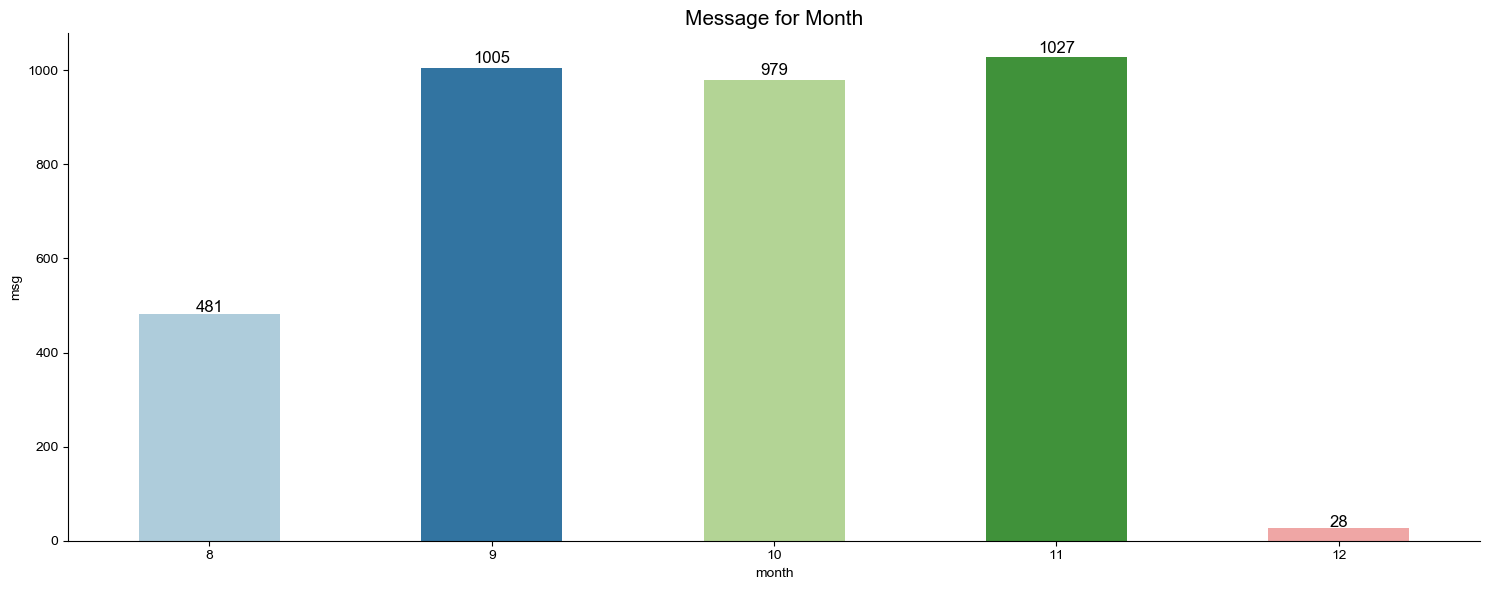

In [16]:
# 월별 전체 채팅량
message_classify = message_df.groupby(['month'])[['msg']].count()
message_classify.reset_index(inplace = True)

plt.figure(figsize = (15, 6))
aa = sns.barplot(data = message_classify,
                x = 'month',
                y = 'msg',
                width = 0.5,
                palette = 'Paired')

# 수치 표시
for p in aa.patches:
            height = p.get_height()
            aa.text(p.get_x() + p.get_width() / 2., height * 1.01, int(height), ha = 'center', size = 12)

plt.title('Message for Month', fontsize = 15)
sns.despine()
plt.tight_layout()
plt.savefig(save_f_path + 'Message for Month')

In [17]:
# 요일별 
message_dow = message_df.groupby(['day_name'])[['msg']].count()
message_dow.reset_index(inplace = True)

# Sort the DataFrame by 'day_name' using the custom order
custom_order = ['일요일', '월요일', '화요일', '수요일', '목요일', '금요일', '토요일']
message_dow = message_dow.sort_values(by = 'day_name', key = lambda x: x.map({day: i for i, day in enumerate(custom_order)}))
message_dow

,day_name,msg
4,일요일,86
3,월요일,542
6,화요일,898
2,수요일,761
1,목요일,573
0,금요일,550
5,토요일,110


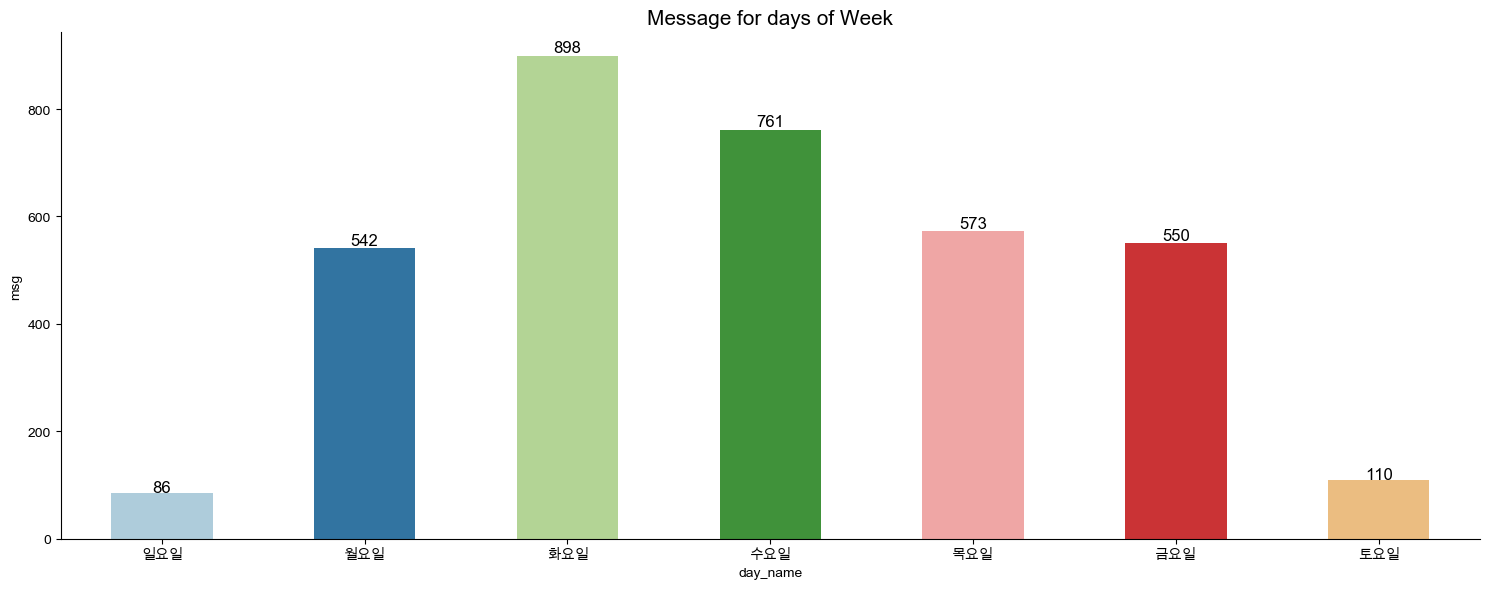

In [18]:
plt.figure(figsize = (15, 6))
aa = sns.barplot(x = 'day_name', y = 'msg', data = message_dow, palette = 'Paired', width = 0.5)

# 수치 표시
for p in aa.patches:
            height = p.get_height()
            aa.text(p.get_x() + p.get_width() / 2., height * 1.01, int(height), ha = 'center', size = 12)

plt.title('Message for days of Week', fontsize = 15)
sns.despine()
plt.tight_layout()
plt.savefig(save_f_path + 'Msg for dow')

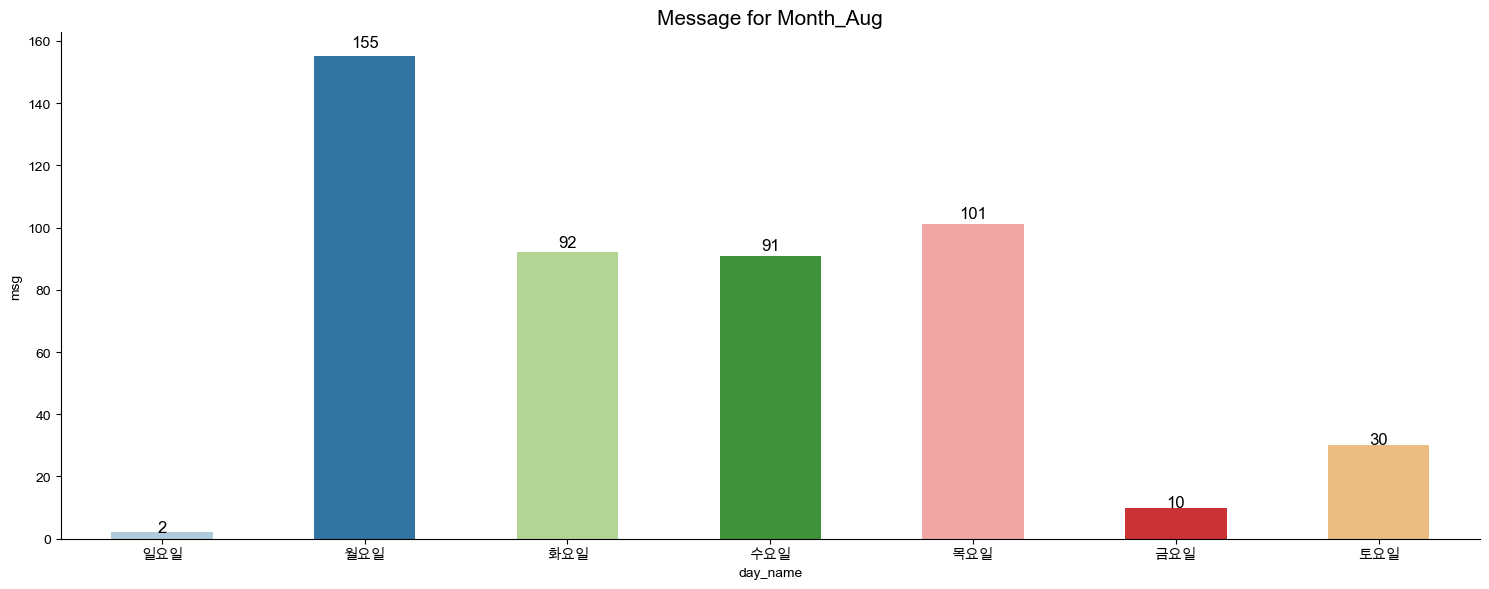

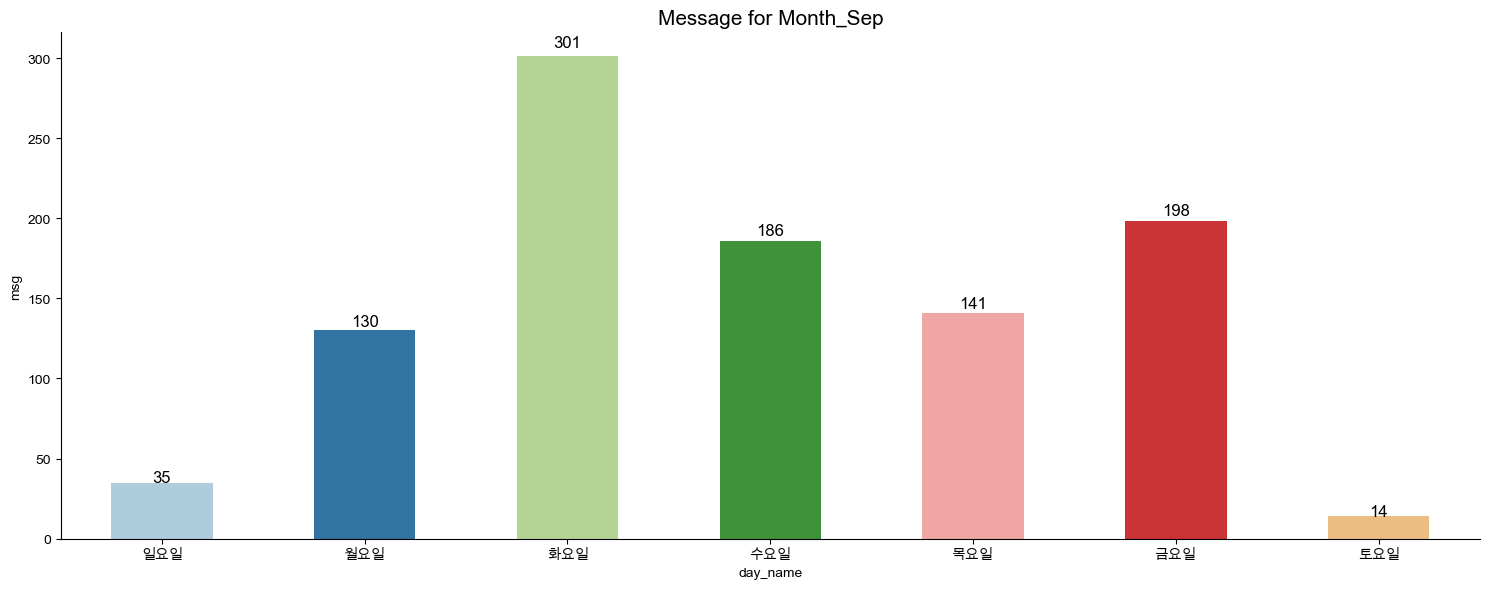

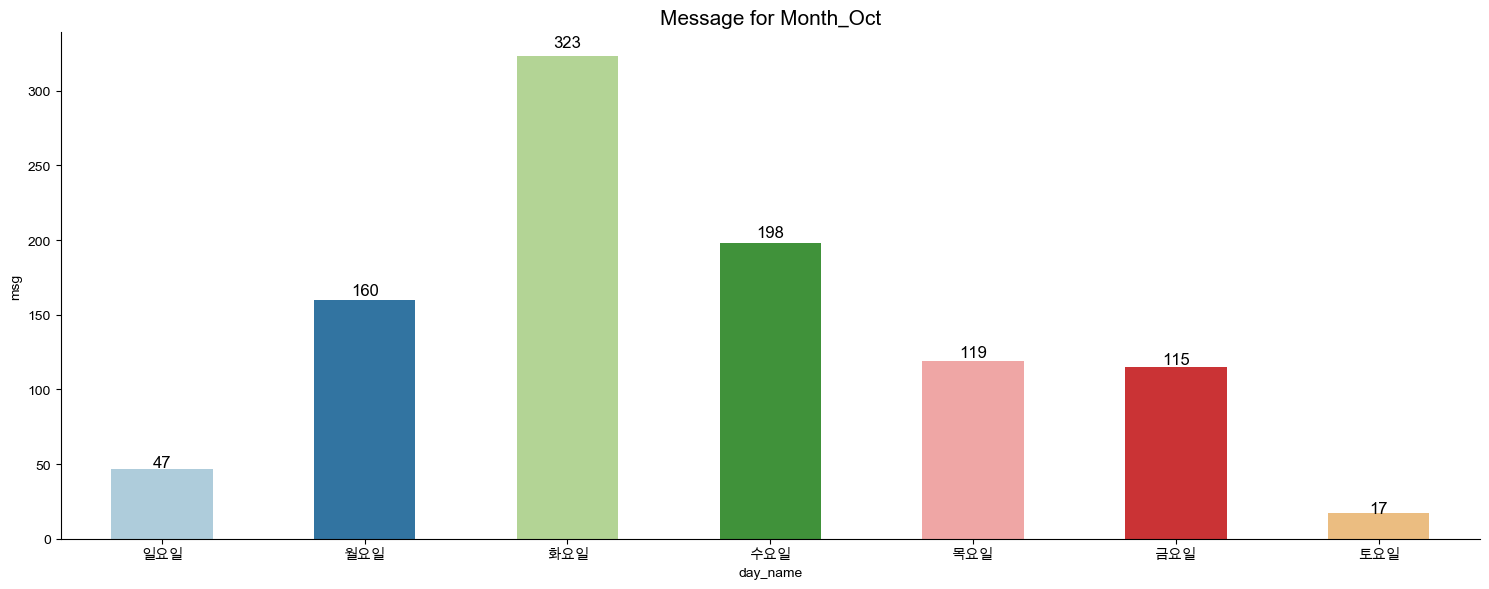

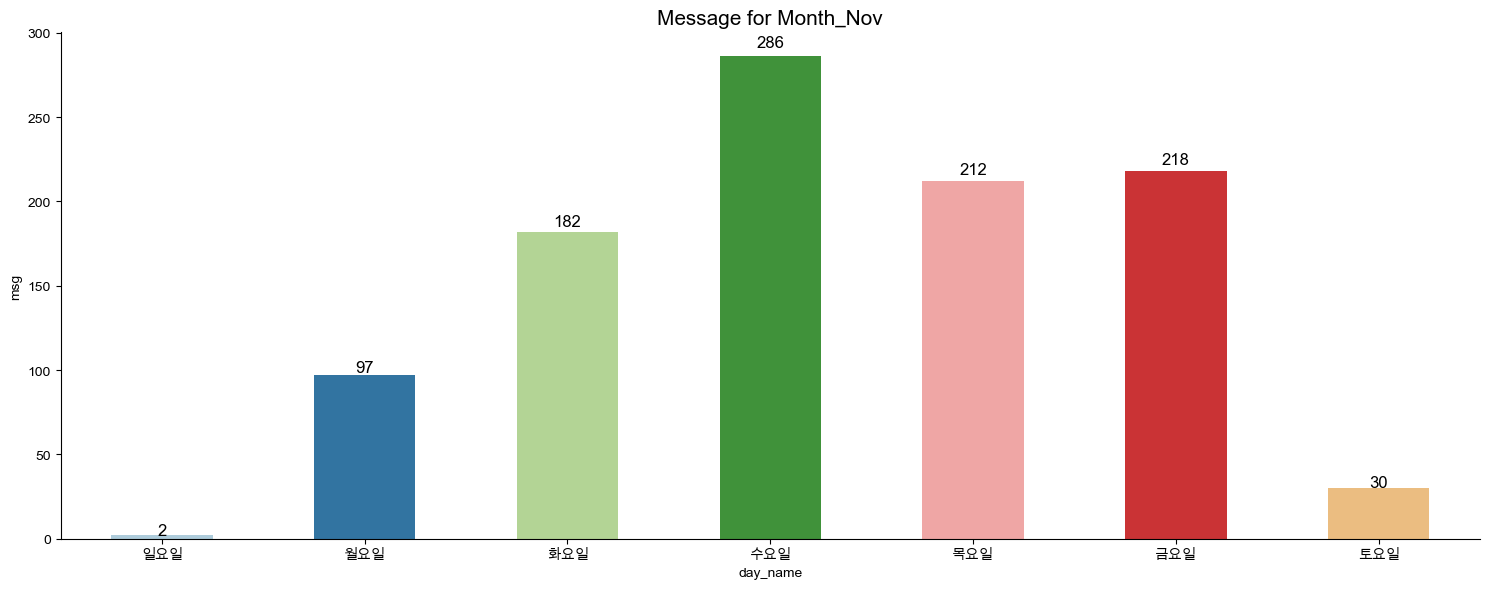

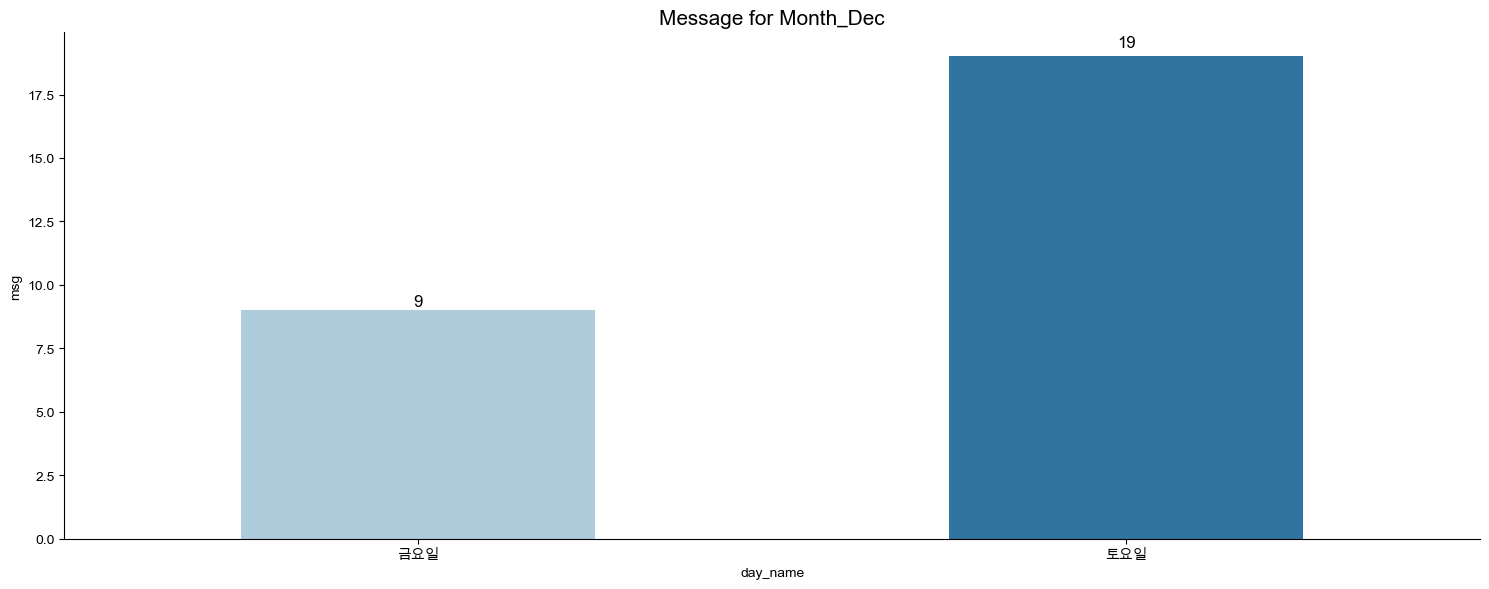

In [19]:
message_dow_month = message_df.groupby(['day_name','month_name'])[['msg']].count()

for mon in message_df['month_name'].unique():
    message_dow_month = message_df[message_df['month_name'] == mon]
    message_dow_month = message_dow_month.groupby(['day_name'])[['msg']].count()
    message_dow_month.reset_index(inplace = True)
    message_dow_month = message_dow_month.sort_values(by = 'day_name', key = lambda x: x.map({day: i for i, day in enumerate(custom_order)}))

    plt.figure(figsize = (15, 6))
    aa = sns.barplot(data = message_dow_month, x = 'day_name', y = 'msg', palette = 'Paired', width = 0.5)
    plt.title('Message for Month_{}' .format(str(mon[:3])), fontsize = 15)
    
    # 수치 표시
    for p in aa.patches:
        height = p.get_height()
        aa.text(p.get_x() + p.get_width() / 2., height * 1.02, int(height), ha = 'center', size = 12)

    sns.despine()
    plt.tight_layout()
    plt.savefig(save_f_path + 'Msg for dow ({})' .format(mon))

## 채팅 여부 판단

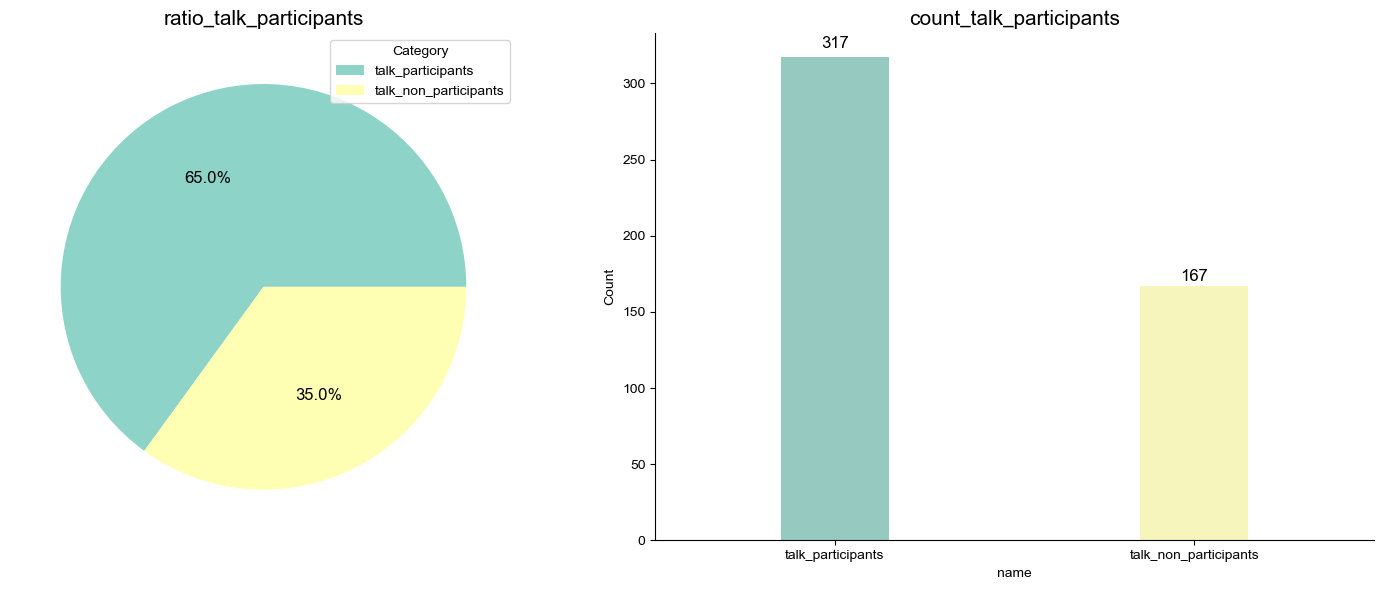

In [20]:
chat_df = df[['talk_date', 'day_name', 'writer', 'wrote_at', 'msg', 'is_talking_activity']]
chat_talk_df = chat_df[chat_df['is_talking_activity'] == True]

ratio = pd.DataFrame(
    {'name' : ['population', 'talk_participants', 'talk_non_participants'],
     'count' : [len(chat_df['writer'].unique()), len(chat_talk_df['writer'].unique()), len(chat_df['writer'].unique()) - len(chat_talk_df['writer'].unique())],
     })

ratio['rate'] = round(ratio['count'] / len(chat_df['writer'].unique()) * 100, 0)

ratio_case = ratio.iloc[1:]

f, ax = plt.subplots(1, 2, figsize = (15, 6))

# 서브플롯 1: 파이 차트 (채팅 참여자 비율)
ax[0].pie(ratio_case['rate'], autopct='%1.1f%%', colors = sns.color_palette('Set3'), textprops={'fontsize': 12})
ax[0].set_title('ratio_talk_participants', fontsize = 15)
ax[0].legend(loc = 'upper right', title = 'Category', labels = ratio_case['name'])

# 서브플롯 2: 막대 차트
aa = sns.barplot(x = ratio_case['name'], y = ratio_case['count'], palette = 'Set3', ax = ax[1], width = 0.3)
ax[1].set_title('count_talk_participants', fontsize=15)
ax[1].set_ylabel('Count')

for p in aa.patches:
    height = p.get_height()
    aa.text(p.get_x() + p.get_width() / 2., height * 1.02, int(height), ha = 'center', size = 12)

sns.despine()
plt.tight_layout()
plt.savefig(save_f_path + 'talk_participants_cnt&ratio')

In [78]:
len(chat_df['writer'].unique())

484

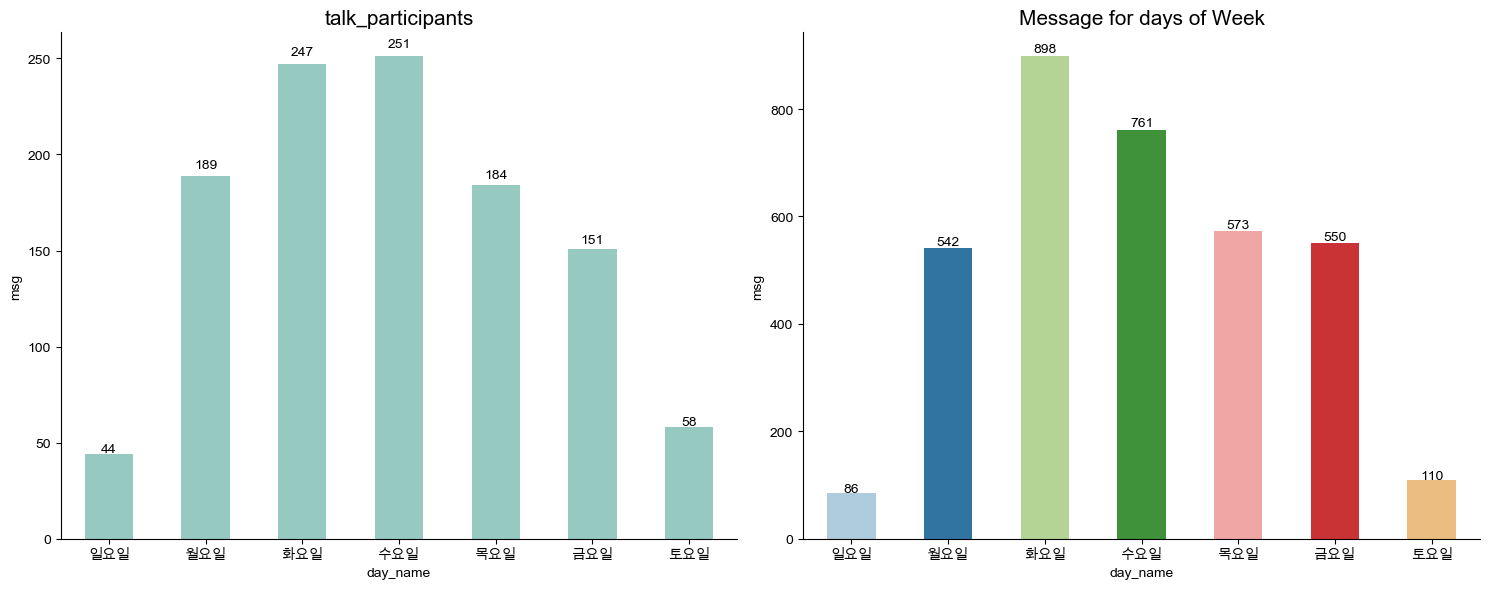

In [105]:
# 요일별 채팅 참여자 수

chat_dup = chat_talk_df.drop_duplicates(subset=['talk_date','day_name','writer','is_talking_activity'])
chat_dow_df = chat_dup.groupby('day_name')[['msg']].count()
chat_dow_df = chat_dow_df.sort_values(by = 'day_name', key = lambda x: x.map({day: i for i, day in enumerate(custom_order)}))
chat_dow_df.reset_index(inplace = True)
chat_dow_df['non_msg'] = len(chat_df['writer'].unique()) - chat_dow_df['msg']

f, ax = plt.subplots(1, 2, figsize = (15, 6))

# 서브플롯 1: 채팅 참여자 수
specific_color = sns.color_palette('Set3', n_colors=12, desat=None)[0]
aa = sns.barplot(data = chat_dow_df, x = 'day_name', y = 'msg', palette = [specific_color], ax = ax[0], width = 0.5)
ax[0].set_title('talk_participants', fontsize = 15)

for p in aa.patches:
    height = p.get_height()
    aa.text(p.get_x() + p.get_width() / 2., height * 1.02, int(height), ha = 'center', size = 10)

# 서브플롯 2: 참여자 카톡 수

aa = sns.barplot(data = message_dow, x = 'day_name', y = 'msg', palette = 'Paired', width = 0.5)
ax[1].set_title('Message for days of Week', fontsize = 15)

for p in aa.patches:
            height = p.get_height()
            aa.text(p.get_x() + p.get_width() / 2., height * 1.01, int(height), ha = 'center', size = 10)

plt.tight_layout()
sns.despine()
plt.savefig(save_f_path + 'talk_participants_dow')

- 대화내용 수 파악

In [127]:
# 요일별 채팅 수 데이터 프레임 생성
chat_name_df = chat_talk_df.groupby(['talk_date','day_name','writer'])[['msg']].count()
chat_name_df.reset_index(inplace = True)
chat_name_df.head()

,talk_date,day_name,writer,msg
0,2023-08-14,월요일,Frodo/데이터분석/신입,1
1,2023-08-14,월요일,PA(어린이팬)/데이터분석/2년차,8
2,2023-08-14,월요일,Roy/PM/5년차,1
3,2023-08-14,월요일,도달/DA/2년,2
4,2023-08-14,월요일,라이언/기계,1


In [131]:
# 전체 채팅 갯수 내림차순
chat_name_rnk = chat_name_df.groupby('writer')[['msg']].sum()
chat_name_rnk = chat_name_rnk.reset_index().sort_values('msg', ascending = False)
chat_top20 = chat_name_rnk.head(20)

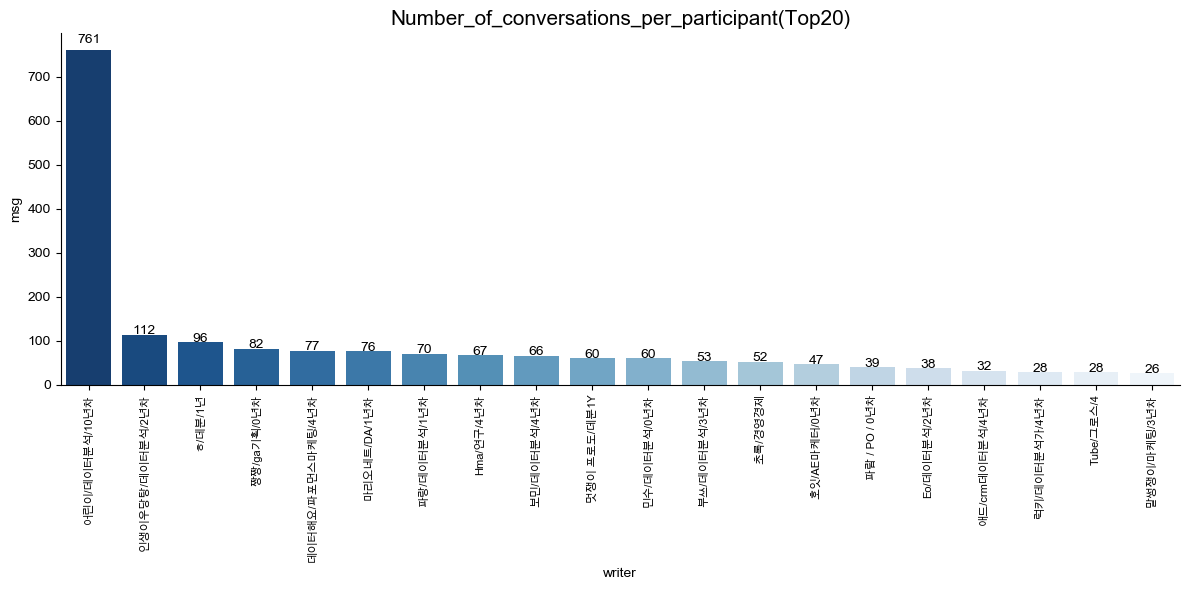

In [176]:
plt.figure(figsize = (12, 6))
aa = sns.barplot(data = chat_top20, x = chat_top20['writer'], y = chat_top20['msg'], palette = 'Blues_r', width = 0.8)
plt.title('Number_of_conversations_per_participant(Top20)', fontsize = 15)
plt.xticks(rotation=90, fontsize = 8)

for p in aa.patches:
    height = p.get_height()
    aa.text(p.get_x() + p.get_width() / 2., height * 1.02, int(height), ha = 'center', size = 10)

sns.despine()
plt.tight_layout()
plt.savefig(save_f_path + '# of_conversations_top20')

- 이탈자 카톡 수

In [232]:
# 데이터프레임 생성
bye_df = df[['talk_date', 'day_name', 'writer', 'msg', 'is_talking_activity', 'action_msg']]

# 액션 구분 (0 : 들어오기, 1: 나가기, 2: 메세지 가리기)
bye_df['io_classified'] = bye_df['action_msg'].apply(lambda x: 0 if ('들어오기' in str(x)) else (1 if ('나가기' in str(x)) else (2 if ('메시지 가리기' in str(x)) else -1)))

# 이탈자 닉네임
out_people = bye_df[bye_df['io_classified'] == 1]['writer'].unique()


/var/folders/f3/dfbq5rkn5517bcqt2jlmr5nh0000gn/T/ipykernel_87299/2693933806.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bye_df['io_classified'] = bye_df['action_msg'].apply(lambda x: 0 if ('들어오기' in str(x)) else (1 if ('나가기' in str(x)) else (2 if ('메시지 가리기' in str(x)) else -1)))


126

In [256]:
bye_chat = bye_df[(bye_df['is_talking_activity'] == True) & (bye_df['writer'].isin(out_people))]
bye_chat.head()

bye_chat = bye_chat.groupby(['talk_date', 'day_name', 'writer'])[['msg']].count()
bye_chat.reset_index(inplace = True)

# 이탈자 채팅 갯수 내림차순
bye_chat_rnk = bye_chat.groupby('writer')[['msg']].sum()
bye_chat_rnk = bye_chat_rnk.reset_index().sort_values('msg', ascending = False)
bye_chat_rnk

,writer,msg
6,민주/데이터분석/4년차,7
0,갹/7,5
5,무지/DA/3년,5
10,장영운/AI GENtlemans,4
12,페페/창업지원/5년차,4
2,대박/마케팅/3년차,3
3,든든/퍼포먼스마케터/2년차,3
9,엄지척 제이지,3
1,꾝/상경,2
4,로믹/빅데이터비즈니스,2


In [262]:
len(bye_df[bye_df['io_classified'] == 1]), len(bye_chat_rnk)

(127, 14)

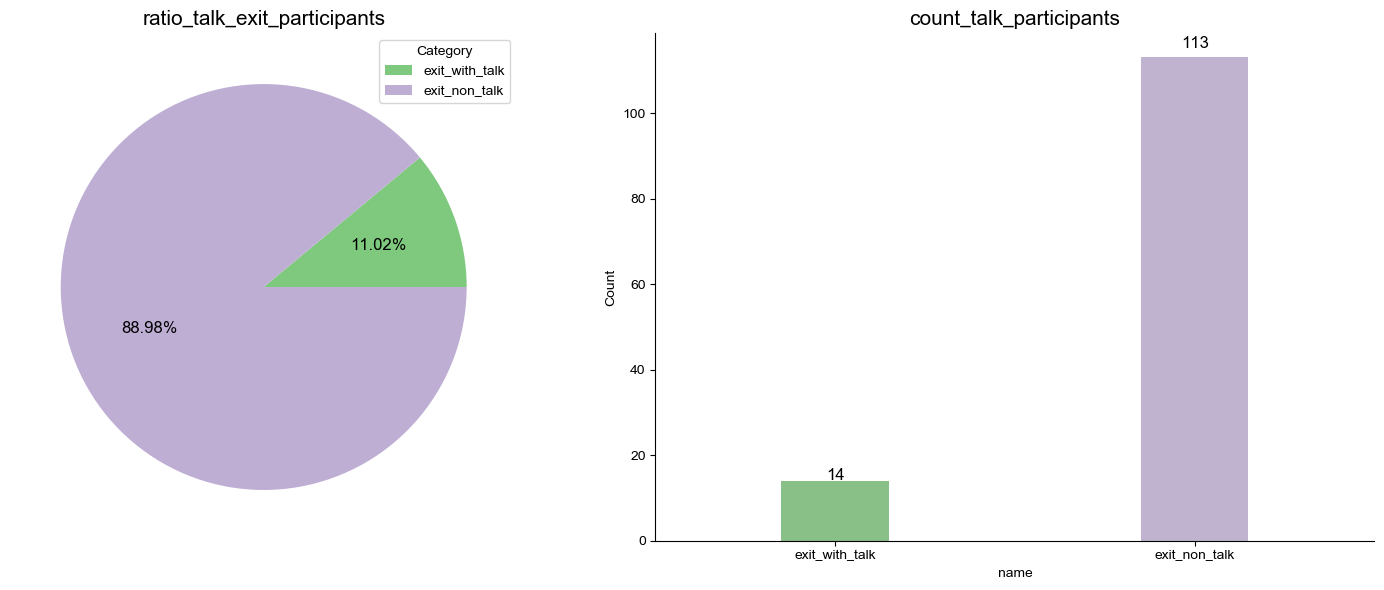

In [297]:
bye_ratio = pd.DataFrame(
    {'name' : ['exit_all', 'exit_with_talk', 'exit_non_talk'],
     'count' : [len(bye_df[bye_df['io_classified'] == 1]), len(bye_chat_rnk), len(bye_df[bye_df['io_classified'] == 1]) - len(bye_chat_rnk)],
     })

bye_ratio['rate'] = round(bye_ratio['count'] / len(bye_df[bye_df['io_classified'] == 1]) * 100, 2)
bye_ratio_case = bye_ratio.iloc[1:]

f, ax = plt.subplots(1, 2, figsize = (15, 6))

# 서브플롯 1: 파이 차트 (채팅 참여자 비율)
ax[0].pie(bye_ratio_case['rate'], autopct='%1.2f%%', colors = sns.color_palette('Accent'), textprops={'fontsize': 12})
ax[0].set_title('ratio_talk_exit_participants', fontsize = 15)
ax[0].legend(loc = 'upper right', title = 'Category', labels = bye_ratio_case['name'])

# 서브플롯 2: 막대 차트
aa = sns.barplot(x = bye_ratio_case['name'], y = bye_ratio_case['count'], palette = 'Accent', ax = ax[1], width = 0.3)
ax[1].set_title('count_talk_participants', fontsize = 15)
ax[1].set_ylabel('Count')

for p in aa.patches:
    height = p.get_height()
    aa.text(p.get_x() + p.get_width() / 2., height * 1.02, int(height), ha = 'center', size = 12)

sns.despine()
plt.tight_layout()
plt.savefig(save_f_path + 'exit_participants_cnt&ratio')

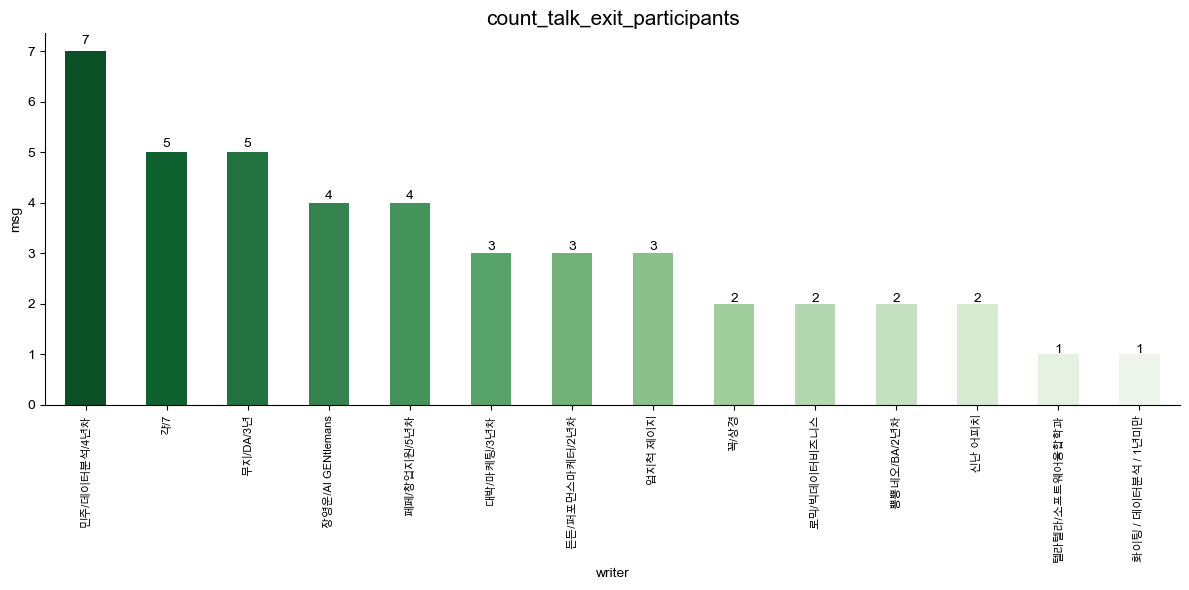

In [303]:
# 플롯 3: 채팅 참여자들 대화 수
plt.figure(figsize = (12, 6))
aa = sns.barplot(data = bye_chat_rnk, x = bye_chat_rnk['writer'], y = bye_chat_rnk['msg'], palette = 'Greens_r', width = 0.5)
plt.title('count_talk_exit_participants', fontsize = 15)
plt.xticks(rotation = 90, fontsize = 8)

for p in aa.patches:
    height = p.get_height()
    aa.text(p.get_x() + p.get_width() / 2., height * 1.02, int(height), ha = 'center', size = 10)

sns.despine()
plt.tight_layout()
plt.savefig(save_f_path + 'exit_participants_talk_count')